In [1]:
from qiskit import *
from qiskit.providers.aqt import AQT

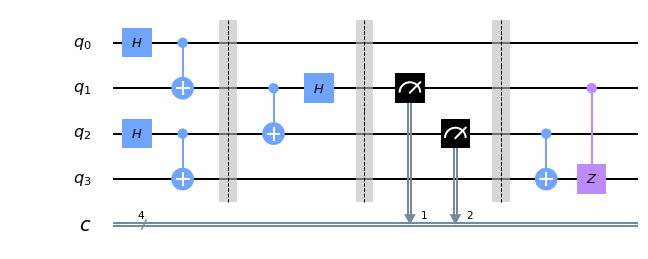

In [2]:
c = QuantumCircuit(4,4)
c.h(0)
c.h(2)
c.cx(0,1)
c.cx(2,3)
c.barrier()
c.cx(1,2)
c.h(1)
c.barrier()
c.measure([1,2],[1,2])
c.barrier()
c.cx(2,3)
c.cz(1,3)
c.draw(output='mpl')

In [ ]:
sim = Aer.get_backend('qasm_simulator')
sres = execute(c, backend = sim, shots = 2048).result()
from qiskit.visualization import plot_histogram
plot_histogram(sres.get_counts(c))

In [ ]:
IBMQ.load_account()
provider_sc = IBMQ.get_provider('ibm-q')
qcomp_sc = provider_sc.get_backend('ibmq_5_yorktown')

In [ ]:
job_sc = execute(c, backend=qcomp_sc, shots = 2048)
from qiskit.tools.monitor import job_monitor
job_monitor(job_sc)

In [ ]:
#plotting the result of the computation on quantum device
qres_sc = job_sc.result()
plot_histogram([sres.get_counts(c),qres_sc.get_counts(c)], legend = ['Simulator','Quantum Device'], figsize=(15,10))

In [ ]:
#provider_ion = AQT.enable_account('aqt')
#qcomp_ion =  provider_ion.get_backend('aqt_innsbruck')

In [3]:
qcomp_ion = AQT.enable_account('2633b2d14dae4d9da7c9df2503857334')
backends = qcomp_ion.backends()
innsbruck_backend = qcomp_ion.get_backend('aqt_qasm_simulator')

job_ion = execute(c, backend = innsbruck_backend, shots = 2048)
job_monitor(job_ion)

HTTPError: 404 Client Error: Not Found for url: http://0f4aa71c.ngrok.io/cirq

In [ ]:
qres_ion = job_ion.result()
plot_histogram([sres.get_counts(c),qres_ion.get_counts(c)], legend = ['Simulator','Quantum Device'], figsize=(40,10))